# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Tools Required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, confusion_matrix, plot_roc_curve, recall_score, f1_score, classification_report

## Load Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

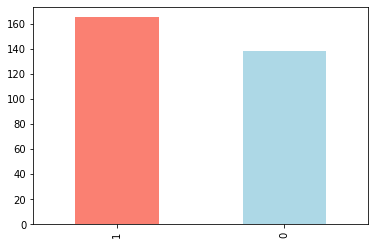

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

## Data Exploration

**Heart Disease Frequency for Sex**

In [9]:
pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


In [10]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

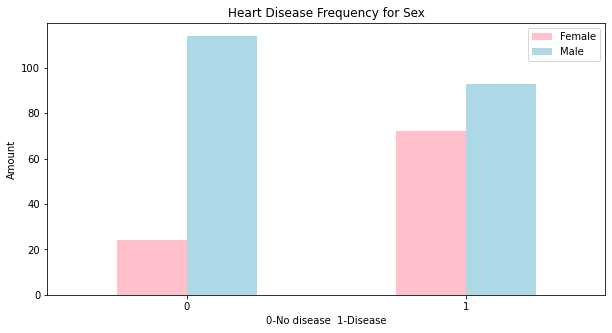

In [11]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", color=["pink", "lightblue"], figsize=(10, 5))
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0-No disease  1-Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

**Age v Maximum Heart Rate(thalach) for Heart Disease**

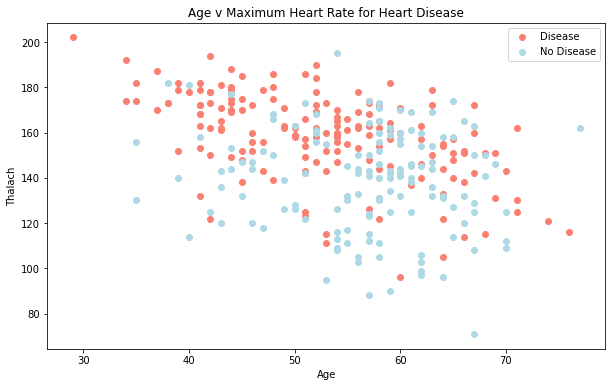

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color=["salmon"])
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color=["lightblue"])

plt.title("Age v Maximum Heart Rate for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease", "No Disease"])

**Heart Disease Frequency for Chest Pain Type**

In [13]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

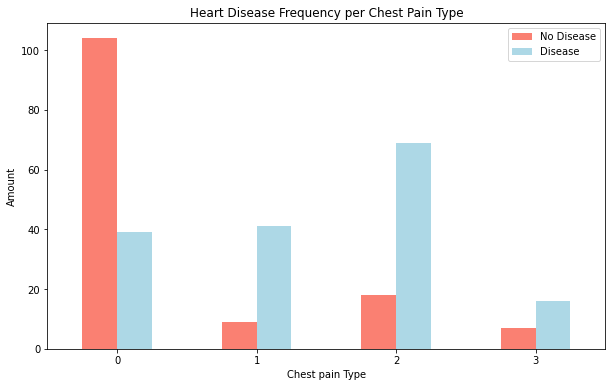

In [14]:
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["salmon", "lightblue"], figsize=(10, 6))

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [16]:
corr_matrix = df.corr()

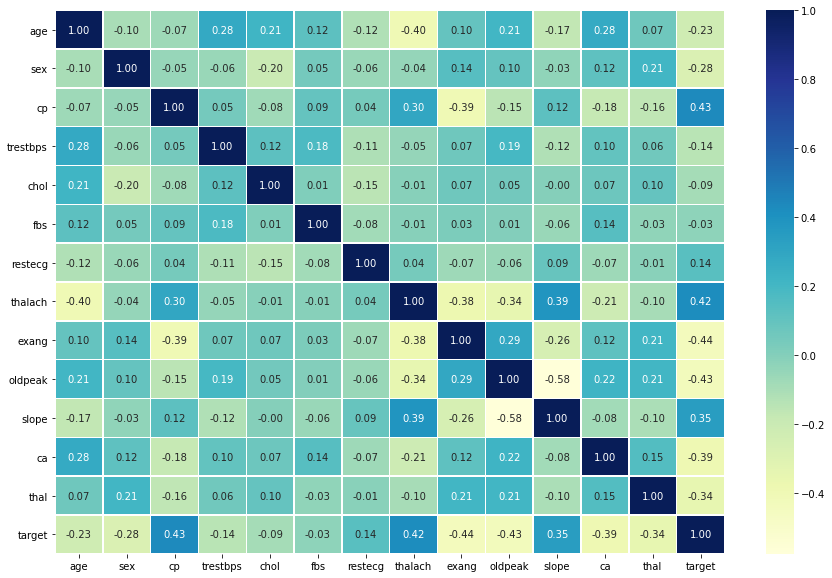

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Modelling

In [18]:
X = df.drop('target', axis=1)
y = df["target"]

In [19]:
np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
len(X_train)

242

In [21]:
models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier()}

def fit_and_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(101)
    models_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        models_scores[name] = model.score(X_test, y_test)
    return models_scores

In [22]:
models_scores = fit_and_score(models=models,
                              X_train=X_train,
                               y_train=y_train,
                              X_test=X_test,
                              y_test=y_test)
models_scores

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'K-Nearest Neighbors': 0.6557377049180327,
 'Random Forest Classifier': 0.8360655737704918}

In [23]:
models_compare = pd.DataFrame(models_scores, index=["Accuracy"])
models_compare.T

,Accuracy
Logistic Regression,0.868852
K-Nearest Neighbors,0.655738
Random Forest Classifier,0.836066


<AxesSubplot:>

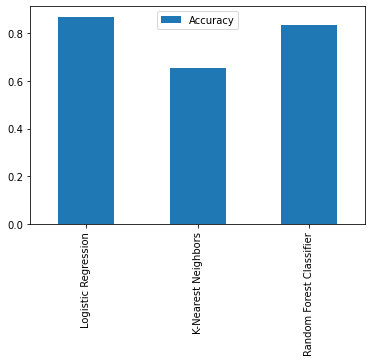

In [24]:
models_compare.T.plot.bar()
#plt.xticks(rotation=0)

## Improving the Model

**Hyperparameter tuning (Manually)**

In [25]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    

In [26]:
train_scores

[1.0,
 0.7851239669421488,
 0.731404958677686,
 0.7520661157024794,
 0.7396694214876033,
 0.7355371900826446,
 0.743801652892562,
 0.7231404958677686,
 0.7024793388429752,
 0.7024793388429752,
 0.7148760330578512,
 0.7066115702479339,
 0.6942148760330579,
 0.6983471074380165,
 0.7066115702479339,
 0.7107438016528925,
 0.6942148760330579,
 0.7107438016528925,
 0.7024793388429752,
 0.6942148760330579]

In [27]:
test_scores

[0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6557377049180327,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.6885245901639344,
 0.6557377049180327,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.639344262295082,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344]

In [28]:
max(test_scores)*100

70.49180327868852

The Maximum KNN Score on test data 70.49%


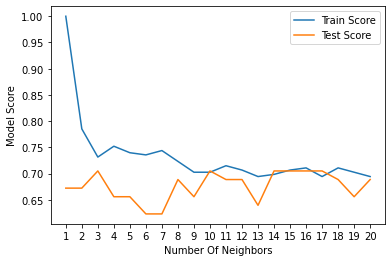

In [29]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number Of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"The Maximum KNN Score on test data {max(test_scores)*100:.2f}%")

**Hyperparameter Tuning using RamdomizedSearchCV**

In [30]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split":np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [31]:
np.random.seed(101)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                n_iter=20,
                                cv=20,
                                verbose=True)
rs_log_reg.fit(X_train, y_train)

Fitting 20 folds for each of 20 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    9.5s finished


RandomizedSearchCV(cv=20, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [34]:
np.random.seed(101)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           n_iter=20,
                           cv=5,
                           verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_depth': 10}

In [36]:
rs_rf.score(X_test, y_test)

0.8524590163934426

**Hyperparameter tuning with GridSearchCV**

In [37]:
log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}

np.random.seed(101)
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [39]:
gs_log_reg.score(X_test, y_test)

0.8524590163934426

## Evaluating a Model

In [40]:
LogisticRegression().fit(X_train, y_train).score(X_test, y_test)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8688524590163934

In [41]:
## The Logistic Regression's with default Parameters Performs better 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8688524590163934

In [42]:
y_preds = gs_log_reg.predict(X_test)

In [43]:
y_preds

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [44]:
confusion_matrix(y_test, y_preds)

array([[23,  8],
       [ 1, 29]], dtype=int64)

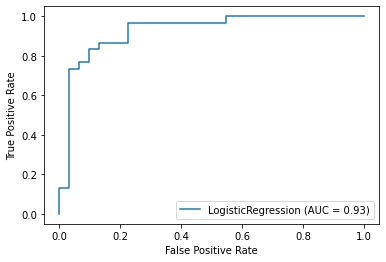

In [45]:
plot_roc_curve(log_reg, X_test, y_test)

In [46]:
conf_mat = confusion_matrix(y_test, y_preds)

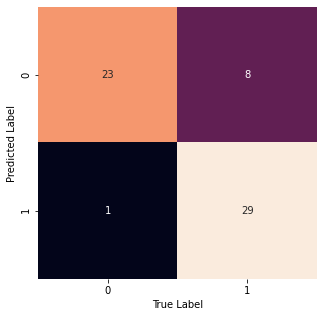

In [47]:
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



In [49]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        30

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



**Evaluation Metrics Using Cross Validation**

In [50]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [51]:
clf = LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [52]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [53]:
cv_prec = np.mean(cross_val_score(clf, X, y, cv=5, scoring="precision"))
cv_prec

0.8182683982683983

In [54]:
cv_recall = np.mean(cross_val_score(clf, X, y, cv=5, scoring="recall"))
cv_recall

0.9030303030303031

In [55]:
cv_f1 = np.mean(cross_val_score(clf, X, y, cv=5, scoring="f1"))
cv_f1

0.8572876223964057

<AxesSubplot:title={'center':'Cross-validated Classification Metrics'}>

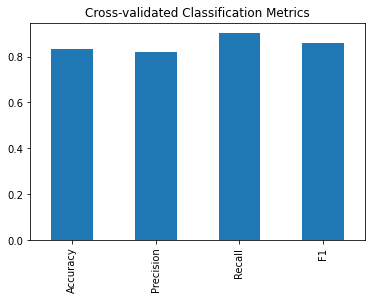

In [56]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, "Precision": cv_prec, "Recall": cv_recall, "F1": cv_f1}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics", legend=False)

## Feature Importance

In [58]:
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [59]:
clf = LogisticRegression(C=0.1082636733874054, solver='liblinear')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [60]:
clf.coef_

array([[ 0.00728048, -0.51686656,  0.66589462, -0.01487605, -0.00340645,
         0.03104055,  0.18161848,  0.02644686, -0.42354452, -0.40308078,
         0.31469644, -0.59328254, -0.5324176 ]])

In [63]:
print(zip(df.columns, list(clf.coef_)))

<AxesSubplot:>

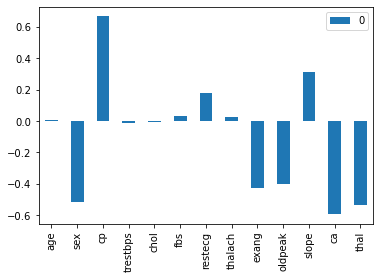

In [74]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar()

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_params_'